# Distribuições de Dados

Para aprofundarmos em Distribuições de Dados vamos primeiro revisar as medidas de dispersão.

## Medidas de Dispersão
 
As **medidas de dispersão** são ferramentas estatísticas que nos ajudam a entender a variabilidade ou a dispersão dos dados em torno de uma medida central, como a média ou a mediana. Enquanto as medidas de tendência central (média, mediana, moda) resumem os dados em um único valor, as medidas de dispersão nos mostram o quão espalhados ou concentrados estão os dados.

Neste tópico, exploraremos as principais medidas de dispersão, como **variância**, **desvio padrão**, **amplitude** e **intervalo interquartil (IQR)**, e discutiremos como elas são usadas na análise de dados.

---

As medidas de dispersão são essenciais para:

- Compreensão da variabilidade pois nos ajudam a entender o quão consistentes ou variáveis são os dados.

- Comparação entre conjuntos de dados uma vez que podemos comparar a dispersão de diferentes conjuntos de dados para identificar padrões ou anomalias.

- Fundamentos para técnicas estatísticas, pois veremos que além do Teorema do Limite Central, intervalos de confiança e testes de hipóteses, também dependem do entendimento da dispersão dos dados.

--- 

#### Amplitude
A **amplitude** é a diferença entre o maior e o menor valor de um conjunto de dados. É a medida de dispersão mais simples, mas também a mais sensível a valores extremos (outliers).

$$
\text{Amplitude} = \text{Valor Máximo} - \text{Valor Mínimo}
$$

**Exemplo**: Em um conjunto de dados $[3, 7, 8, 5, 12]$, a amplitude é $12 - 3 = 9$.

---

####  Variância
A **variância** mede o quão distantes os valores estão da média. É calculada como a média dos quadrados das diferenças entre cada valor e a média.

$$
\text{Variância} (\sigma^2) = \frac{1}{n} \sum_{i=1}^{n} (x_i - \bar{x})^2
$$

Onde:
- $x_i$: Cada valor do conjunto de dados.
- $\bar{x}$: Média dos dados.
- $n$: Número de observações.

**Exemplo**: Para o conjunto de dados $[3, 7, 8, 5, 12]$, a variância é calculada a patir de $\bar{x} = 7$, como:

$$
\sigma^2 = \frac{(3-7)^2 + (7-7)^2 + (8-7)^2 + (5-7)^2 + (12-7)^2}{5} = 10.8
$$

---

#### Desvio Padrão
O **desvio padrão** é a raiz quadrada da variância. Ele expressa a dispersão dos dados na mesma unidade dos dados originais, o que facilita a interpretação.

$$
\text{Desvio Padrão} (\sigma) = \sqrt{\text{Variância}}
$$

**Exemplo**: No mesmo conjunto de dados, o desvio padrão é $\sqrt{10.8} \approx 3.29$.

---

#### Intervalo Interquartil (IQR)
O **intervalo interquartil (IQR)** é a diferença entre o terceiro quartil ($Q3$) e o primeiro quartil ($Q1$). Ele mede a dispersão dos 50% centrais dos dados, sendo menos sensível a valores extremos.

$$
\text{IQR} = Q3 - Q1
$$

**Exemplo**: Para o conjunto de dados $[3, 5, 7, 8, 12]$, os quartis são:
- $Q1 = 5$
- $Q3 = 8$
- $\text{IQR} = 8 - 5 = 3$

---

### Medida de Dispersão Adequada

- **Amplitude**: Útil para uma visão rápida da dispersão, mas sensível a outliers.
- **Variância e Desvio Padrão**: Ideais para dados simétricos e sem outliers.
- **IQR**: Melhor para dados assimétricos ou com outliers.

---

### Exemplo Prático: Análise de Dados de Rendimento Anual
Vamos usar os dados do capítulo 2 do livro {cite:p}`bruce2020practical` sobre rendimentos anuais de candidatos a empréstimos. 

In [65]:
import pandas as pd
import numpy as np

from pathlib import Path 
from scipy import stats
from sklearn.utils import resample 

In [66]:
LOANS_INCOME_CSV = 'data/loans_income.csv' 

loans_income = pd.read_csv(LOANS_INCOME_CSV).squeeze('columns')

# Calcular as medidas de dispersão
amplitude = loans_income.max() - loans_income.min()
variancia = loans_income.var()
desvio_padrao = loans_income.std()
iqr = loans_income.quantile(0.75) - loans_income.quantile(0.25)

# Exibir os resultados
print(f"Amplitude: {amplitude}")
print(f"Variância: {round(variancia)}")
print(f"Desvio Padrão: {round(desvio_padrao)}")
print(f"IQR: {round(iqr)}") 

Amplitude: 195000
Variância: 1080570709
Desvio Padrão: 32872
IQR: 40000


Podemos fazer uma representação gráfica de algumas dessas medidas de dispersão com uma distribuição seguida de um boxplot. 

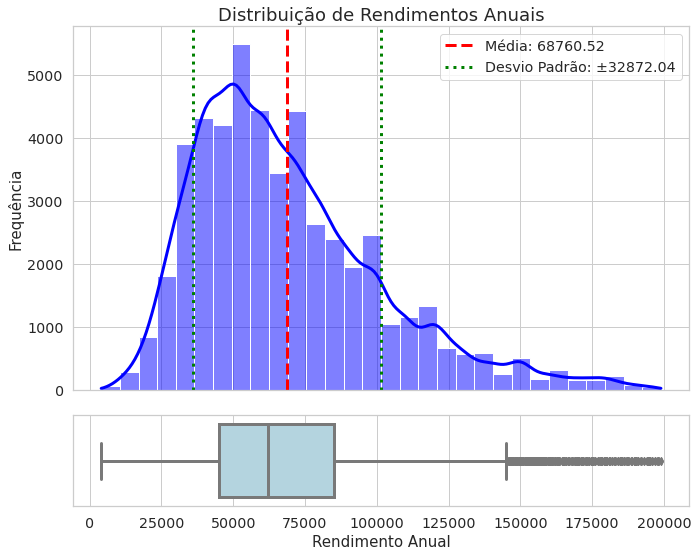

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt

# Exemplo de dados (substitua pelo seu DataFrame ou série)
np.random.seed(42) 

# Configuração do estilo do gráfico
sns.set(style="whitegrid")
# Configuração do estilo do gráfico
sns.set(style="whitegrid", font_scale=1.3)  # Reduz o tamanho da fonte global
plt.rcParams['lines.linewidth'] = 3  # Define a espessura das linhas como fina
# Criação da figura e dos eixos
fig, (ax1, ax2) = plt.subplots(
    nrows=2, 
    figsize=(10, 8), 
    gridspec_kw={'height_ratios': [4, 1]}, 
    sharex=True
)

# Gráfico de distribuição (histograma + curva de densidade)
sns.histplot(loans_income, kde=True, ax=ax1, color='blue', bins=30)
ax1.set_title('Distribuição de Rendimentos Anuais', fontsize=18)
ax1.set_ylabel('Frequência', fontsize=15)

# Boxplot horizontal
sns.boxplot(x=loans_income, ax=ax2, color='lightblue', orient='h')
ax2.set_xlabel('Rendimento Anual', fontsize=15)

# Adicionar média e desvio padrão ao gráfico de distribuição
media = loans_income.mean()
desvio_padrao = loans_income.std()
ax1.axvline(media, color='red', linestyle='--', label=f'Média: {media:.2f}')
ax1.axvline(media - desvio_padrao, color='green', linestyle=':', label=f'Desvio Padrão: ±{desvio_padrao:.2f}')
ax1.axvline(media + desvio_padrao, color='green', linestyle=':')
ax1.legend(loc='upper right')

# Ajustar layout para evitar sobreposição
plt.tight_layout()

# Exibir o gráfico
plt.show()

A distância do desvio padrão dos dados é representada para a direita e para a esquerda pelas linhas verdes. A linha vermelha representa a média. 
No gráfico de baixo temos um boxplot que mostra a mediana e o tamanho da caixa é o IQR (Intervalo Interquartil).
O boxplot é uma forma simplicada de visualizar a distribuição dos dados.

## Distribuição de Amostragem 

O termo **distribuição de amostragem de uma estatística** do segundo capítulo de {cite:p}`bruce2020practical`, refere-se à distribuição de valores de uma estatística (como a média ou o desvio padrão) calculada a partir de várias amostras extraídas de uma mesma população. Na estatística clássica, um dos principais objetivos é fazer inferências sobre uma população com base em amostras relativamente pequenas. Devemos considerar os importantes tópicos:

- **Inferência Estatística**: Quando extraímos uma amostra de uma população, usamos estatísticas amostrais (como a média ou a variância) para estimar parâmetros populacionais. No entanto, como estamos trabalhando com uma amostra, há sempre um grau de incerteza associado a essas estimativas.
- **Variabilidade Amostral**: Diferentes amostras podem produzir estatísticas diferentes. A distribuição de amostragem nos ajuda a entender a variabilidade dessas estatísticas e a quantificar a incerteza associada às nossas estimativas.
- **Tamanho da Amostra**: Quanto maior o tamanho da amostra, mais precisa e estável será a estimativa da estatística. Isso ocorre porque a distribuição de amostragem tende a se tornar mais concentrada e simétrica à medida que o tamanho da amostra aumenta.

### Diferença Entre Distribuição dos Dados e Distribuição de Amostragem

- **Distribuição dos Dados**: Refere-se à distribuição dos valores individuais em um conjunto de dados. Por exemplo, a distribuição dos rendimentos anuais de candidatos a empréstimo.
- **Distribuição de Amostragem**: Refere-se à distribuição de uma estatística (como a média) calculada a partir de várias amostras. Essa distribuição tende a ser mais regular e próxima de uma distribuição normal (campanular) do que a distribuição dos dados originais.

 

 


 
### Exemplo Prático: Rendimentos Anuais de Candidatos a Empréstimo

Vamos ilustrar esses conceitos com um exemplo utilizando dados de rendimentos anuais de candidatos a empréstimo no Lending Club usado anteriormente. Considere três cenários:

1. **Amostra de 1.000 valores individuais**:
   - A distribuição dos dados é amplamente espalhada e assimétrica, com uma inclinação para valores mais altos.

2. **Amostra de 1.000 médias de 5 valores**:
   - A distribuição das médias é mais compacta e próxima de uma distribuição normal.

3. **Amostra de 1.000 médias de 20 valores**:
   - A distribuição das médias é ainda mais compacta e campanular, demonstrando o efeito do aumento do tamanho da amostra.

Vamo construir um código para gerar os histogramas.

In [68]:
sample_data = pd.DataFrame({
    'income': loans_income.sample(1000),
    'type': 'Data',
})

sample_mean_05 = pd.DataFrame({
    'income': [loans_income.sample(5).mean() for _ in range(1000)],
    'type': 'Mean of 5',
})

sample_mean_20 = pd.DataFrame({
    'income': [loans_income.sample(20).mean() for _ in range(1000)],
    'type': 'Mean of 20',
})

results = pd.concat([sample_data, sample_mean_05, sample_mean_20])
print(results.head())

         income  type
33553   92000.0  Data
9427    50000.0  Data
199     40000.0  Data
12447   95000.0  Data
39489  135000.0  Data


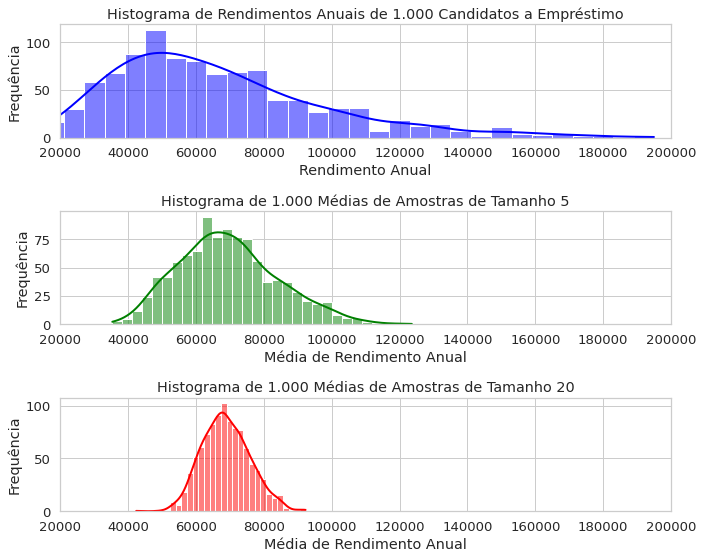

In [71]:
# Simulação dos dados de rendimento anual
np.random.seed(42)  # Para reproducibilidade
 
# Amostra de 1.000 valores individuais
sample_data = pd.DataFrame({
    'income': loans_income.sample(1000, random_state=42),
    'type': 'Data',
})

# Amostra de 1.000 médias de 5 valores
sample_mean_05 = pd.DataFrame({
    'income': [loans_income.sample(5, random_state=i).mean() for i in range(1000)],
    'type': 'Mean of 5',
})

# Amostra de 1.000 médias de 20 valores
sample_mean_20 = pd.DataFrame({
    'income': [loans_income.sample(20, random_state=i).mean() for i in range(1000)],
    'type': 'Mean of 20',
})

# Combina os dados em um único DataFrame
results = pd.concat([sample_data, sample_mean_05, sample_mean_20])

# Configuração do estilo do gráfico
sns.set(style="whitegrid")

sns.set(style="whitegrid", font_scale=1.2)
plt.rcParams['lines.linewidth'] = 2

# Criação dos histogramas
plt.figure(figsize=(10, 8))

# Histograma para os dados originais
plt.subplot(3, 1, 1)
sns.histplot(sample_data['income'], kde=True, color='blue', bins=30)
plt.xlim(20000, 200000)
plt.title('Histograma de Rendimentos Anuais de 1.000 Candidatos a Empréstimo')
plt.xlabel('Rendimento Anual')
plt.ylabel('Frequência')

# Histograma para as médias de 5 valores
plt.subplot(3, 1, 2)
sns.histplot(sample_mean_05['income'], kde=True, color='green', bins=30)
plt.xlim(20000, 200000)
plt.title('Histograma de 1.000 Médias de Amostras de Tamanho 5')
plt.xlabel('Média de Rendimento Anual')
plt.ylabel('Frequência')

# Histograma para as médias de 20 valores
plt.subplot(3, 1, 3)
sns.histplot(sample_mean_20['income'], kde=True, color='red', bins=30)
plt.xlim(20000, 200000)
plt.title('Histograma de 1.000 Médias de Amostras de Tamanho 20')
plt.xlabel('Média de Rendimento Anual')
plt.ylabel('Frequência')

# Ajusta o layout para evitar sobreposição
plt.tight_layout()

# Exibe o gráfico
plt.show()

No gráfico foi usada a biblioteca seaborn. 

## Teorema do Limite Central

O **Teorema do Limite Central (TLC)** é um dos conceitos mais importantes da estatística e da ciência de dados. Ele fornece a base teórica para muitas técnicas de inferência estatística, como intervalos de confiança e testes de hipóteses. Neste tópico, exploraremos o que é o TLC, por que ele é importante e como aplicá-lo na prática.

---

### Conceito

O Teorema do Limite Central afirma que, **independentemente da distribuição da população**, a distribuição das médias amostrais se aproxima de uma distribuição normal à medida que o tamanho da amostra aumenta. Em outras palavras:

- Se você coletar várias amostras de uma população (com ou sem distribuição normal) e calcular a média de cada amostra, a distribuição dessas médias será aproximadamente normal.
- Quanto maior o tamanho da amostra, mais próxima a distribuição das médias estará de uma distribuição normal.

### Conceito formal

Dada uma população com média $\mu$ e desvio padrão $\sigma$, a distribuição das médias amostrais ($\bar{X}$) de tamanho $n$ terá:
- Média: $\mu$
- Desvio padrão: $\frac{\sigma}{\sqrt{n}}$ (também conhecido como **erro padrão da média**)

A distribuição das médias amostrais será aproximadamente normal para $n$ suficientemente grande (geralmente $n \geq 30$).

---

### Importância

O TLC é fundamental porque:
1. **Permite inferências sobre populações**: Mesmo que a distribuição da população seja desconhecida ou não normal, podemos usar a distribuição normal para fazer inferências sobre a média populacional.
2. **Justifica o uso da distribuição normal**: Muitas técnicas estatísticas, como testes de hipóteses e intervalos de confiança, assumem que a distribuição das médias amostrais é normal.
3. **Aplica-se a diversas situações**: O TLC é válido para quase qualquer tipo de distribuição populacional, desde que as amostras sejam suficientemente grandes.

---

### Condições para aplicação

Para que o TLC seja válido, algumas condições devem ser atendidas:
1. **Amostras independentes**: As observações na amostra devem ser independentes umas das outras.
2. **Tamanho da amostra**: O TLC funciona melhor com amostras grandes ($n \geq 30$). Para populações altamente assimétricas, amostras maiores podem ser necessárias.
3. **Variância finita**: A população deve ter uma variância finita ($\sigma^2 < \infty$).

---
 

### Exemplo gráfico para o teorema do limite central

Para ilustrar o TLC graficamente nós vamos fazer o equivalente ao que foi feito no exemplo de rendimentos anuais, que foi discutido anteriormente. Portanto iremos:
 
- Usar uma distribuição assimétrica (por exemplo, uma distribuição exponencial ou log-normal) para simular a população.

- Extrair várias amostras de tamanho pequeno, médio e grande da população.

- Calcule a média de cada amostra.

- Plotar as distribuições das médias amostrais a fim de comparar a distribuição das médias amostrais com a distribuição da população.

- Por fim mostrar como a distribuição das médias se torna mais normal à medida que o tamanho da amostra aumenta.

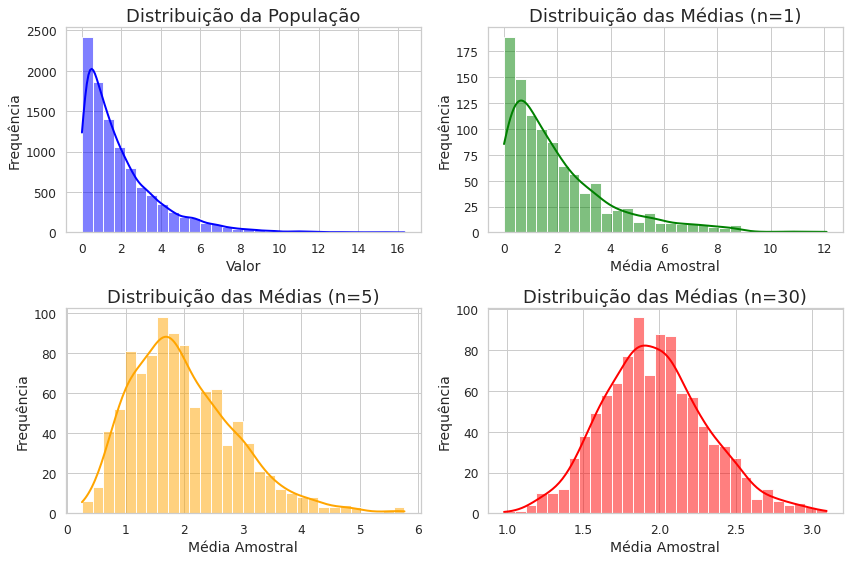

In [70]:
# Configuração do estilo do gráfico
sns.set(style="whitegrid", font_scale=1.1)
plt.rcParams['lines.linewidth'] = 2

# Gerar dados de uma população não normal (distribuição exponencial)
np.random.seed(42)
populacao = np.random.exponential(scale=2.0, size=10000)

# Função para calcular médias amostrais
def calcular_medias_amostrais(populacao, tamanho_amostra, n_amostras):
    medias = [np.mean(np.random.choice(populacao, tamanho_amostra)) for _ in range(n_amostras)]
    return medias

# Tamanhos das amostras
tamanhos_amostra = [1, 5, 30, 100]
n_amostras = 1000

# Calcular médias para cada tamanho de amostra
medias_amostrais = {f'n={n}': calcular_medias_amostrais(populacao, n, n_amostras) for n in tamanhos_amostra}

# Criar DataFrame para facilitar a plotagem
df = pd.DataFrame(medias_amostrais)

# Plotar as distribuições
plt.figure(figsize=(12, 8))

# Distribuição da população
plt.subplot(2, 2, 1)
sns.histplot(populacao, kde=True, color='blue', bins=30)
plt.title('Distribuição da População', fontsize=18)
plt.xlabel('Valor', fontsize=14)
plt.ylabel('Frequência', fontsize=14)

# Distribuição das médias amostrais para n=1
plt.subplot(2, 2, 2)
sns.histplot(df['n=1'], kde=True, color='green', bins=30)
plt.title('Distribuição das Médias (n=1)', fontsize=18)
plt.xlabel('Média Amostral', fontsize=14)
plt.ylabel('Frequência', fontsize=14)

# Distribuição das médias amostrais para n=5
plt.subplot(2, 2, 3)
sns.histplot(df['n=5'], kde=True, color='orange', bins=30)
plt.title('Distribuição das Médias (n=5)', fontsize=18)
plt.xlabel('Média Amostral', fontsize=14)
plt.ylabel('Frequência', fontsize=14)

# Distribuição das médias amostrais para n=30
plt.subplot(2, 2, 4)
sns.histplot(df['n=30'], kde=True, color='red', bins=30)
plt.title('Distribuição das Médias (n=30)', fontsize=18)
plt.xlabel('Média Amostral', fontsize=14)
plt.ylabel('Frequência', fontsize=14)

# Ajustar layout
plt.tight_layout()

# Exibir o gráfico
plt.show()

## O Método Bootstrap

O **método Bootstrap** é uma técnica de reamostragem usada em estatística para estimar a distribuição de uma estatística (como a média, mediana ou desvio padrão) a partir de amostras aleatórias com reposição. Ele é especialmente útil quando a distribuição teórica da estatística é desconhecida ou difícil de derivar.

A ideia central do Bootstrap é gerar várias amostras (chamadas de amostras bootstrap) a partir dos dados originais, calcular a estatística de interesse para cada amostra e, em seguida, usar essas estatísticas para inferir propriedades da distribuição, como intervalos de confiança ou erro padrão.
   
   O Bootstrap é uma técnica não paramétrica, ou seja, não assume que os dados seguem uma distribuição específico. Pode ser aplicado a uma ampla variedade de estatísticas, desde médias até coeficientes de regressão.
Além disso é fácil de implementar e entender, especialmente com o uso de ferramentas computacionais, funcionando bem com pequenas amostras e dados complexos.
  
```{figure} /_static/bootstrap.png
:alt: Descrição da imagem
:width: 800px
:align: center

---


### Passos do Método Bootstrap

1. **Coletar uma amostra original**: Tenha um conjunto de dados de tamanho $n$.
2. **Gerar amostras bootstrap**:
   - Extraia amostras de tamanho $n$ **com reposição** a partir dos dados originais.
   - Repita esse processo $B$ vezes (geralmente $B = 1000$ ou mais).
3. **Calcular a estatística de interesse**:
   - Para cada amostra bootstrap, calcule a estatística desejada (por exemplo, a média).
4. **Analisar a distribuição das estatísticas**:
   - Use as estatísticas bootstrap para estimar intervalos de confiança, erro padrão ou outras propriedades.

---

### Aplicações do Bootstrap

1. **Estimação de intervalos de confiança**:
   - Calcule intervalos de confiança para estatísticas como a média ou a mediana.
2. **Estimação de erro padrão**:
   - Use o desvio padrão das estatísticas bootstrap para estimar o erro padrão.
3. **Testes de hipóteses**:
   - Compare estatísticas de diferentes grupos usando amostras bootstrap.
4. **Validação de modelos**:
   - Avalie a performance de modelos de machine learning usando técnicas como o Bootstrap Aggregating (Bagging).

---
 
Vamos ilustrar o método Bootstrap com um exemplo simples: estimar o intervalo de confiança para a média de um conjunto de dados. 

In [72]:
# Dados originais
dados = [30, 35, 40, 45, 50, 55, 60, 100]
n = len(dados)  # Tamanho da amostra original
B = 1000  # Número de amostras bootstrap

# Gerar amostras bootstrap e calcular a média de cada uma
medias_bootstrap = []
for _ in range(B):
    amostra = np.random.choice(dados, size=n, replace=True)  # Amostra com reposição
    media = np.mean(amostra)
    medias_bootstrap.append(media)

# Calcular o intervalo de confiança de 95% para a média
intervalo_confianca = np.percentile(medias_bootstrap, [2.5, 97.5])
media_original = np.mean(dados)

print(f"Média original: {media_original:.2f}")
print(f"Intervalo de confiança de 95%: {intervalo_confianca}")

Média original: 51.88
Intervalo de confiança de 95%: [39.375 67.5  ]


### Método Bootstrap para Dados Multivariados

Dados multivariados são conjuntos de dados onde cada observação (linha) contém múltiplas variáveis (colunas). Por exemplo:
  
| ID  | Idade | Renda (R$) | Educação |
|-----|-------|------------|----------|
| 1   | 25    | 3000       | Graduado |
| 2   | 30    | 5000       | Mestrado |
| 3   | 22    | 2000       | Graduado |



***Passos do Bootstrap Multivariado***

1. **Amostragem com reposição**:  
   Selecione linhas inteiras do conjunto de dados original, permitindo repetições.  
   - Exemplo de amostra bootstrap: `[Linha 1, Linha 3, Linha 1, Linha 5, Linha 2]`.

2. **Cálculo da estatística**:  
   Para cada amostra, calcule a estatística de interesse (ex: média, matriz de covariância).

3. **Repetição**:  
   Repita os passos 1 e 2 por $B$ iterações (ex: $B = 1000$).

4. **Análise**:  
   Use as estatísticas bootstrap para estimar:  
   - Intervalos de confiança  
   - Erro padrão  
   - Viés  
 

In [80]:
import numpy as np

# Dados multivariados (Idade, Renda, Educação codificada)
dados = np.array([
    [25, 3000, 1],  # Graduado
    [30, 5000, 2],  # Mestrado
    [22, 2000, 1],  # Graduado
    [35, 6000, 3],  # Doutorado
    [28, 4000, 2]   # Mestrado
])

B = 1000  # Número de amostras
n = dados.shape[0]  # Tamanho da amostra original
medias_bootstrap = []

for _ in range(B):
    indices = np.random.choice(n, size=n, replace=True)
    amostra = dados[indices, :]
    media = np.mean(amostra, axis=0)
    medias_bootstrap.append(media)

medias_bootstrap = np.array(medias_bootstrap)

In [81]:
# Intervalo de confiança de 95% para cada variável
intervalo_confianca = np.percentile(medias_bootstrap, [2.5, 97.5], axis=0)

print("Média original:", np.mean(dados, axis=0))
print("Intervalos de confiança (95%):\n", intervalo_confianca)

Média original: [2.8e+01 4.0e+03 1.8e+00]
Intervalos de confiança (95%):
 [[2.4400e+01 2.8000e+03 1.2000e+00]
 [3.2005e+01 5.2000e+03 2.4050e+00]]
